# Supervised Learning
### Benign and malignant cancer

In [599]:
import pandas as pd
from matplotlib import pyplot as plt

dataset = pd.read_csv("../data/Cancer_Data.csv")

if 'Unnamed: 32' in dataset.columns:
    dataset.drop('Unnamed: 32', axis=1, inplace=True)
dataset['diagnosis'].replace(['B', 'M'],[0, 1], inplace=True) # B = 0, M = 1 
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [600]:
from sklearn.model_selection import train_test_split

x = dataset.drop(['diagnosis','id'],axis=1)
y = dataset['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)



### Decision Tree

First, we will analyse the dataset with all information, and for that, we first need to create a decision tree.
Our first decision tree will be a default one, created by the scikit learn library.

In [601]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier() 
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Now, we send the decision tree our train sample.

In [602]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

To make the predictions we call the function:

In [603]:
predictions = clf.predict(x_test)

#### Accuracy

In [604]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9298245614035088

#### Precision

In [605]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.8666666666666667

With this code, we can see the importance given to each feature of the dataset by the decision tree.

In [606]:
feature_importance_worst = pd.DataFrame(clf.feature_importances_, index = x_test.columns).sort_values(0, ascending=False)
feature_importance_worst.columns = ['%']
feature_importance_worst

,%
concave points_mean,0.696270
texture_worst,0.113746
area_worst,0.077053
radius_worst,0.054206
area_se,0.013489
radius_se,0.010460
concave points_worst,0.009957
perimeter_se,0.009884
smoothness_se,0.007907
symmetry_worst,0.007028


In our dataset, we have 3 type of data:
 - worst: worst value recorded from that person
 - se: standard error
 - mean: mean a list of values

To see if we can improve our accuracy and precision, we are going to try to separate these 3 types and we will run it with the same decision tree to see if our results improve.<br>
We will also use the same lines as x_train and x_test so we can compare our results.

#### Dataset only with "Worst" values

In [607]:
x_worst_train = x_train.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])
x_worst_test = x_test.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])


clf.fit(x_worst_train,y_train)
predictions_worst = clf.predict(x_worst_test)
accuracy_score(y_test, predictions_worst)

0.9415204678362573

In [608]:
precision_score(y_test, predictions_worst)

0.8833333333333333

In [609]:
from sklearn.metrics import recall_score
recall_score(y_test,predictions_worst)

0.9464285714285714

In [610]:
feature_importance_worst = pd.DataFrame(clf.feature_importances_, index = x_worst_test.columns).sort_values(0, ascending=False)
feature_importance_worst.columns = ['%']
feature_importance_worst

,%
radius_worst,0.699661
concave points_worst,0.150801
texture_worst,0.082290
symmetry_worst,0.020802
smoothness_worst,0.015570
perimeter_worst,0.010402
area_worst,0.009128
concavity_worst,0.008334
compactness_worst,0.003012
fractal_dimension_worst,0.000000


#### Dataset only with "Mean" values

In [611]:
x_mean_train = x_train.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])
x_mean_test = x_test.filter(['fractal_dimension_mean','symmetry_mean','concave points_mean','concavity_mean','compactness_mean','smoothness_mean','area_mean','perimeter_mean','texture_mean','radius_mean'])


clf.fit(x_mean_train,y_train)
predictions_mean = clf.predict(x_mean_test)
accuracy_score(y_test, predictions_mean)

0.9298245614035088

In [612]:
precision_score(y_test, predictions_mean)

0.8928571428571429

In [613]:
feature_importance_mean = pd.DataFrame(clf.feature_importances_, index = x_mean_test.columns).sort_values(0, ascending=False)
feature_importance_mean.columns = ['%']
feature_importance_mean

,%
concave points_mean,0.748977
texture_mean,0.101549
area_mean,0.049854
concavity_mean,0.028152
smoothness_mean,0.017748
perimeter_mean,0.016692
fractal_dimension_mean,0.014855
radius_mean,0.014123
compactness_mean,0.004994
symmetry_mean,0.003056


#### Dataset only with "SE" values

In [614]:
x_se_train = x_train.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])
x_se_test = x_test.filter(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'])


clf.fit(x_se_train,y_train)
predictions_se = clf.predict(x_se_test)
accuracy_score(y_test, predictions_se)

0.8245614035087719

In [615]:
precision_score(y_test, predictions_se)

0.703125

In [616]:
feature_importance_se = pd.DataFrame(clf.feature_importances_, index = x_se_test.columns).sort_values(0, ascending=False)
feature_importance_se.columns = ['%']
feature_importance_se

,%
area_se,0.595919
concavity_se,0.099640
radius_se,0.064211
symmetry_se,0.055721
texture_se,0.047622
fractal_dimension_se,0.035650
perimeter_se,0.032916
compactness_se,0.030008
concave points_se,0.022071
smoothness_se,0.016242


#### Dataset without "SE" values

Since the SE values got the worst results, we will try to use the all the dataset but without the SE values to see if the predictions are better

In [617]:
x_worstMean_train = x_train.drop(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'], axis=1)
x_worstMean_test = x_test.drop(['fractal_dimension_se','symmetry_se','concave points_se','concavity_se','compactness_se','smoothness_se','area_se','perimeter_se','texture_se','radius_se'], axis=1)

clf.fit(x_worstMean_train,y_train)
predictions_worstMean = clf.predict(x_worstMean_test)
accuracy_score(y_test, predictions_worstMean)

0.935672514619883

In [618]:
precision_score(y_test, predictions_worstMean)

0.8688524590163934

In [619]:
feature_importance_worstMean = pd.DataFrame(clf.feature_importances_, index = x_worstMean_test.columns).sort_values(0, ascending=False)
feature_importance_worstMean.columns = ['%']
feature_importance_worstMean

,%
concave points_mean,0.696175
texture_worst,0.090226
area_worst,0.082324
radius_worst,0.054206
texture_mean,0.033887
concavity_mean,0.012519
fractal_dimension_worst,0.010212
compactness_worst,0.009957
concave points_worst,0.009371
symmetry_worst,0.001123


We gathered 30 results from each dataset and calculated the mean of each one to see the differences.<br>
<br>

The average accuracy of each dataset was:
 - "Worst" Values: 0,93410
 - Without "SE" Values: 0,92577 
 - Normal Datase: 0,92027
 - "Mean" Values: 0,90863
 - "SE" Values: 0,87820

<br>

![Alt text](../images/decision_tree_accuracy.png)

<br>
In this graph we can see that the dataset with the "worst" columns has the best results in terms of accuracy but it's still very close to the dataset without the Standard Error (SE) columns and with the Normal dataset.
<br>


The same happened with the precision, being the dataset with the "Worst" values the best one.

 - "Worst" Values: 0,91085
 - Without "SE" Values: 0,90221
  - Normal Datase: 0,89370
 - "Mean" Values: 0,87820
 - "SE" Values: 0,76504

<br>

![Alt text](../images/decision_tree_precision.png)

<br>

The fact that the values are all very close might be explained by the fact that the Decision tree algorithm uses the greedy algorithm at each split finding a local optima, since "worst" values give the best results, all the datasets containing that values are going to be very similar. <br>
A way to improve decision trees is to avoid overfitting. This could be made by limiting maximum depth, pruning etc.
When we prune a tree we are correcting it after it has been fitted to the training dataset. It starts at the leaf nodes and removes those branches that do not affect the overall tree accuracy. It also lowers the complexity of the model.
<br>
In our code we can use sklearn to prune our trees using the ``ccp_alpha`` attribute inside the ``DecisionTreeClassifier`` function.


### Dataset with "worst" values using pruning

To prune a tree using sklearn we have to set the attribute `ccp_alpha` inside the `DecisionTreeClassifier` function but this value varies with each tree.<br>
A way to calculate the best alpha value for each tree is to get the different applicable alpha values. Then we just run the same decision tree with the different alpha values to get the accuracy.<br>
The code below shows the relation between alpha and accuracy.

Text(0, 0.5, 'Accuracy scores')

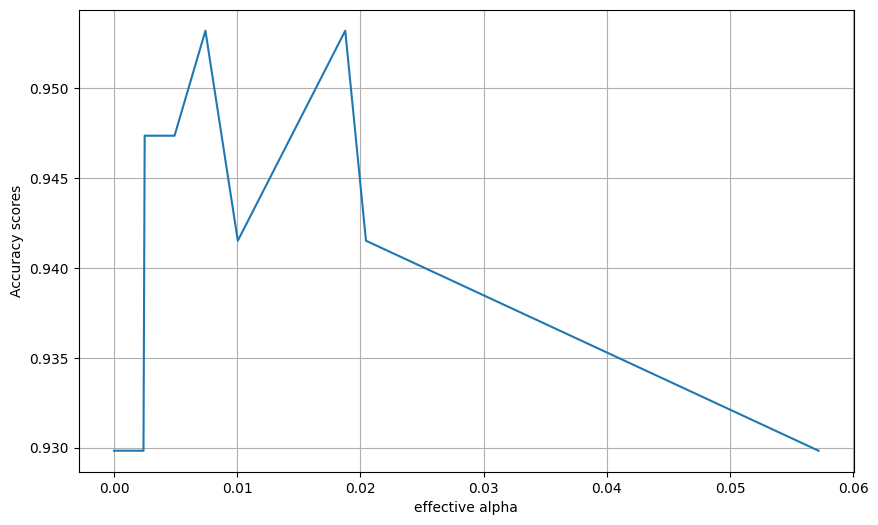

In [620]:
path = clf.cost_complexity_pruning_path(x_worst_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []

for ccp_alpha in ccp_alphas:
    clf_worst = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_worst.fit(x_worst_train, y_train)
    clfs.append(clf_worst)

acc_scores = [accuracy_score(y_test, clf_worst.predict(x_worst_test)) for clf_worst in clfs]

plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1])
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

In [621]:
from statistics import mean
accuracy_values = []

for i in range(100):
    x_alpha = x.filter(['fractal_dimension_worst','symmetry_worst','concave points_worst','concavity_worst','compactness_worst','smoothness_worst','area_worst','perimeter_worst','texture_worst','radius_worst'])

    x_alpha_train, x_alpha_test, y_alpha_train, y_alpha_test = train_test_split(x_alpha, y, test_size=0.3)
    
    clf_alpha = DecisionTreeClassifier() 

    path = clf_alpha.cost_complexity_pruning_path(x_alpha_train, y_alpha_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    clfs = []

    for ccp_alpha in ccp_alphas:
        clf_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
        clf_alpha.fit(x_alpha_train, y_alpha_train)
        clfs.append(clf_alpha)

    acc_scores = [accuracy_score(y_alpha_test, clf_alpha.predict(x_alpha_test)) for clf_alpha in clfs]
    accuracy_values.append(max(acc_scores))

mean(accuracy_values)

    


0.9459649122807017